# Business Question:
## "What are the key factors influencing the pricing of airfares between different cities?"

### **Group 2**:

*   Jarred Carroll
*   Joshua Cunninghan

*   Iman Mohamed
*   Miaoyi Qian






In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()
file_path = next(iter(uploaded))

Saving Airfares.csv to Airfares.csv


In [ ]:
# Read the file
df = pd.read_csv("Airfares.csv")
print(f"Number of records: {df.shape[0]:,}\nNumber of columns: {df.shape[1]:,}")

Number of records: 638
Number of columns: 18


In [ ]:
df.head()

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,No,Yes,5291.99,28637.0,21112.0,3036732,205711,Free,Free,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,No,No,5419.16,26993.0,29838.0,3532657,7145897,Free,Free,576,8820,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,No,No,9185.28,30124.0,29838.0,5787293,7145897,Free,Free,364,6452,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Controlled,Free,612,25144,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Free,Free,612,25144,85.47


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
COUPON,638.0,1.202335e+00,2.038207e-01,1.00,1.040000e+00,1.150,1.297500e+00,1.94
NEW,638.0,2.753918e+00,7.604481e-01,0.00,3.000000e+00,3.000,3.000000e+00,3.00
HI,638.0,4.442141e+03,1.724267e+03,1230.48,3.090137e+03,4208.185,5.480575e+03,10000.00
S_INCOME,638.0,2.775986e+04,3.596208e+03,14600.00,2.470600e+04,28637.000,2.969350e+04,38813.00
E_INCOME,638.0,2.766373e+04,4.611325e+03,14600.00,2.390300e+04,26409.000,3.198100e+04,38813.00
S_POP,638.0,4.557004e+06,3.010985e+06,29838.00,1.862106e+06,3532657.000,7.830332e+06,9056076.00
E_POP,638.0,3.194503e+06,2.735604e+06,111745.00,1.228816e+06,2195215.000,4.549784e+06,9056076.00
DISTANCE,638.0,9.756536e+02,6.462424e+02,114.00,4.550000e+02,850.000,1.306250e+03,2764.00
PAX,638.0,1.278221e+04,1.320223e+04,1504.00,5.328500e+03,7792.000,1.409050e+04,73892.00
FARE,638.0,1.608767e+02,7.602244e+01,42.47,1.062900e+02,144.600,2.093500e+02,402.02


## Heat Map: Visualizing Missing Values

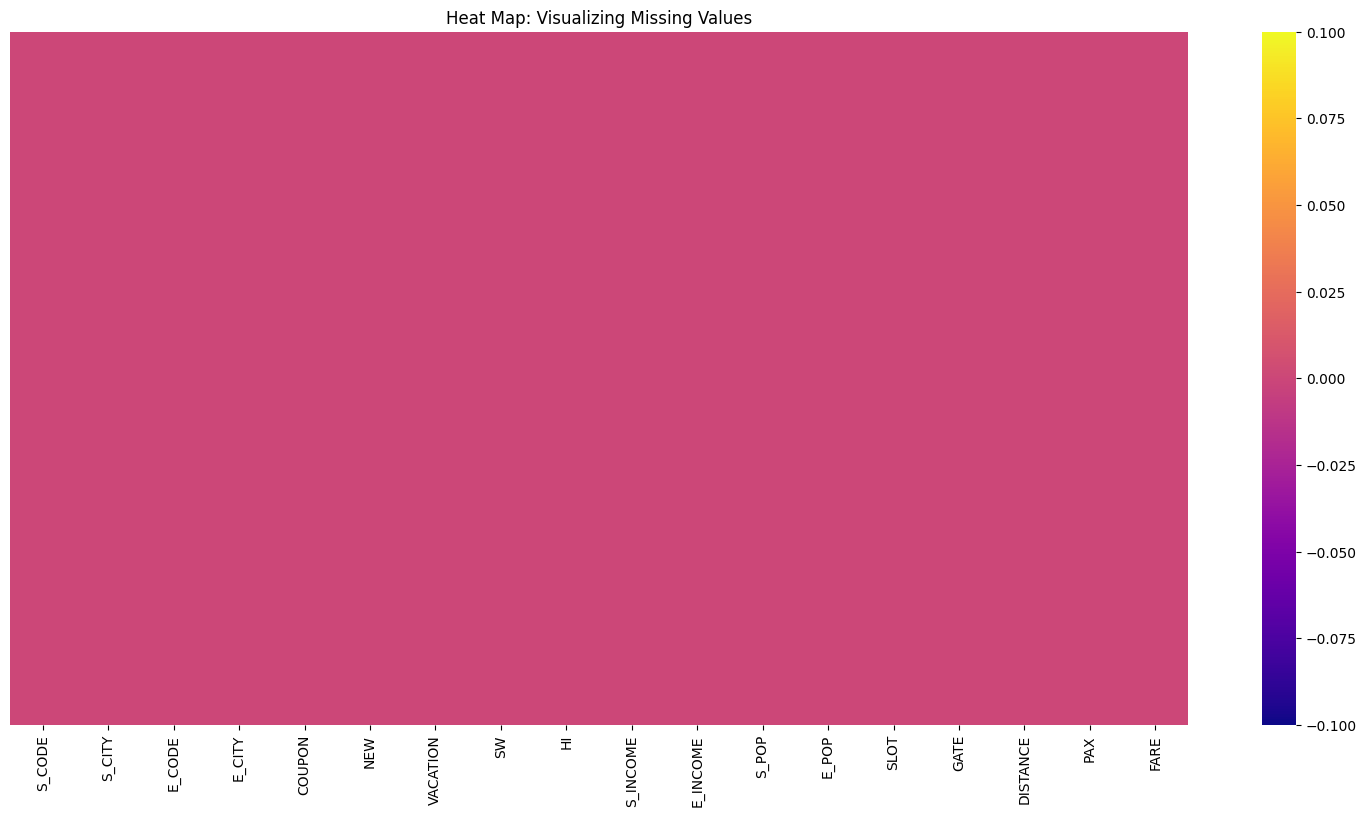

In [ ]:
import seaborn as sns
# visualizing missing values
fig, ax = plt.subplots(figsize=(19,9))
sns.heatmap(df.isnull(), yticklabels=False,cmap='plasma')
plt.title('Heat Map: Visualizing Missing Values')
plt.savefig('Heat Map: Visualizing Missing Values')

## Preprocessing & Handling Missing Values

In [ ]:
# Count missing values per column
missing_values = df.isnull().sum()

# Calculate percentage of missing values per column
percentage_missing = (missing_values / len(df)) * 100

# Create a DataFrame to display the results
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': percentage_missing
})

# Display the summary
print(missing_data_summary)

          Missing Values  Percentage Missing
S_CODE                 0                 0.0
S_CITY                 0                 0.0
E_CODE                 0                 0.0
E_CITY                 0                 0.0
COUPON                 0                 0.0
NEW                    0                 0.0
VACATION               0                 0.0
SW                     0                 0.0
HI                     0                 0.0
S_INCOME               0                 0.0
E_INCOME               0                 0.0
S_POP                  0                 0.0
E_POP                  0                 0.0
SLOT                   0                 0.0
GATE                   0                 0.0
DISTANCE               0                 0.0
PAX                    0                 0.0
FARE                   0                 0.0


In [ ]:
# Display the info of the cleaned DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S_CODE    638 non-null    object 
 1   S_CITY    638 non-null    object 
 2   E_CODE    638 non-null    object 
 3   E_CITY    638 non-null    object 
 4   COUPON    638 non-null    float64
 5   NEW       638 non-null    int64  
 6   VACATION  638 non-null    object 
 7   SW        638 non-null    object 
 8   HI        638 non-null    float64
 9   S_INCOME  638 non-null    float64
 10  E_INCOME  638 non-null    float64
 11  S_POP     638 non-null    int64  
 12  E_POP     638 non-null    int64  
 13  SLOT      638 non-null    object 
 14  GATE      638 non-null    object 
 15  DISTANCE  638 non-null    int64  
 16  PAX       638 non-null    int64  
 17  FARE      638 non-null    float64
dtypes: float64(5), int64(5), object(8)
memory usage: 89.8+ KB


### Dropping Columns with Missing Data Over 60%

More than 70% of entries in both 'E_CODE' and 'S_CODE' consist of '*' values, rendering them largely unusable for deriving meaningful insights.

Moreover, the columns 'E_CODE' and 'S_CODE' contain city code names, while the actual city names are provided in separate columns 'E_CITY' and 'S_CITY'. As these columns duplicate information and do not contribute significantly to the dataset, we have removed them to streamline the data.

In [ ]:
# Read the file
df = pd.read_csv("Airfares.csv")

# Count the number of rows with '*'
rows_with_asterisk = df[df.apply(lambda row: '*' in row.values, axis=1)]
num_rows_with_asterisk = len(rows_with_asterisk)

# Count the number of columns with '*'
columns_with_asterisk = df.columns[df.isin(['*']).any()]
num_columns_with_asterisk = len(columns_with_asterisk)

print("Number of rows with '*':", num_rows_with_asterisk)
print("Number of columns with '*':", num_columns_with_asterisk)


Number of rows with '*': 622
Number of columns with '*': 2


In [ ]:
# Get unique values in the 'E_CODE' column
unique_values_e_code = df['E_CODE'].unique()

print("Unique values in the 'E_CODE' column:")
print(unique_values_e_code)


Unique values in the 'E_CODE' column:
['*' 'ORD' 'MDW' 'JFK' 'LGA' 'EWR' 'IAD' 'DCA']


In [ ]:
# Count the occurrences of '*' in the 'E_CODE' column
e_code_star_count = df['E_CODE'].value_counts().get('*', 0)

# Count the occurrences of '*' in the 'S_CODE' column
s_code_star_count = df['S_CODE'].value_counts().get('*', 0)

# Total number of rows
total_rows = len(df)

# Calculate percentages
e_code_star_percentage = (e_code_star_count / total_rows) * 100
s_code_star_percentage = (s_code_star_count / total_rows) * 100

print(f"Percentage of '*' in the 'E_CODE' column: {e_code_star_percentage:.2f}%")
print(f"Percentage of '*' in the 'S_CODE' column: {s_code_star_percentage:.2f}%")


Percentage of '*' in the 'E_CODE' column: 78.53%
Percentage of '*' in the 'S_CODE' column: 71.16%


In [ ]:
# Drop the 'E_CODE' and 'S_CODE' columns
df.drop(columns=['E_CODE', 'S_CODE'], inplace=True)

# Print the DataFrame to verify the changes
df.head()

,S_CITY,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,Dallas/Fort Worth TX,Amarillo TX,1.00,3,No,Yes,5291.99,28637.0,21112.0,3036732,205711,Free,Free,312,7864,64.11
1,Atlanta GA,Baltimore/Wash Intl MD,1.06,3,No,No,5419.16,26993.0,29838.0,3532657,7145897,Free,Free,576,8820,174.47
2,Boston MA,Baltimore/Wash Intl MD,1.06,3,No,No,9185.28,30124.0,29838.0,5787293,7145897,Free,Free,364,6452,207.76
3,Chicago IL,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Controlled,Free,612,25144,85.47
4,Chicago IL,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Free,Free,612,25144,85.47


In [ ]:
# Function to check if a value is float or not
def is_float(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

# Count occurrences of '*' in float columns
num_asterisks = 0
for col in df.columns:
    for value in df[col]:
        if not is_float(value) and value == '*':
            num_asterisks += 1

print("Number of '*' in float columns:", num_asterisks)


Number of '*' in float columns: 0


In [ ]:
# Columns with '*'

# Function to count occurrences of '*' and calculate percentage
def count_asterisks(column):
    asterisk_count = column.eq('*').sum()
    total_count = column.size
    percentage = (asterisk_count / total_count) * 100
    return asterisk_count, percentage

# Dictionary to store results
results = {'Column': [], 'Asterisk Count': [], 'Percentage': []}

# Iterate over columns
for col in df.columns:
    asterisk_count, percentage = count_asterisks(df[col])
    results['Column'].append(col)
    results['Asterisk Count'].append(asterisk_count)
    results['Percentage'].append(percentage)


# Create DataFrame from results
results_df = pd.DataFrame(results)

# Print the results
print(results_df)


      Column  Asterisk Count  Percentage
0     S_CITY               0         0.0
1     E_CITY               0         0.0
2     COUPON               0         0.0
3        NEW               0         0.0
4   VACATION               0         0.0
5         SW               0         0.0
6         HI               0         0.0
7   S_INCOME               0         0.0
8   E_INCOME               0         0.0
9      S_POP               0         0.0
10     E_POP               0         0.0
11      SLOT               0         0.0
12      GATE               0         0.0
13  DISTANCE               0         0.0
14       PAX               0         0.0
15      FARE               0         0.0


In [ ]:
# Rows with '*'

# Function to count occurrences of '*' and calculate percentage in a row
def count_asterisks_row(row):
    asterisk_count = row.eq('*').sum()
    total_count = row.size
    percentage = (asterisk_count / total_count) * 100
    return asterisk_count, percentage

# Dictionary to store results
results_row = {'Row': [], 'Asterisk Count': [], 'Percentage': []}

# Iterate over rows
for index, row in df.iterrows():
    asterisk_count, percentage = count_asterisks_row(row)
    results_row['Row'].append(index)
    results_row['Asterisk Count'].append(asterisk_count)
    results_row['Percentage'].append(percentage)

# Create DataFrame from results
results_row_df = pd.DataFrame(results_row)

# Print the results
print(results_row_df)


     Row  Asterisk Count  Percentage
0      0               0         0.0
1      1               0         0.0
2      2               0         0.0
3      3               0         0.0
4      4               0         0.0
..   ...             ...         ...
633  633               0         0.0
634  634               0         0.0
635  635               0         0.0
636  636               0         0.0
637  637               0         0.0

[638 rows x 3 columns]


In [ ]:
# Calculate the median value of the 'FARE' column
median_fare = df['FARE'].median()

# Find the lowest and highest values in the 'FARE' column
lowest_fare = df['FARE'].min()
highest_fare = df['FARE'].max()

print("Median fare:", median_fare)
print("Lowest fare:", lowest_fare)
print("Highest fare:", highest_fare)

Median fare: 144.6
Lowest fare: 42.47
Highest fare: 402.02


## Visulizing the Data

Visulizing the data to gain insights of data distribution, frequence, and to identify potential outliers.

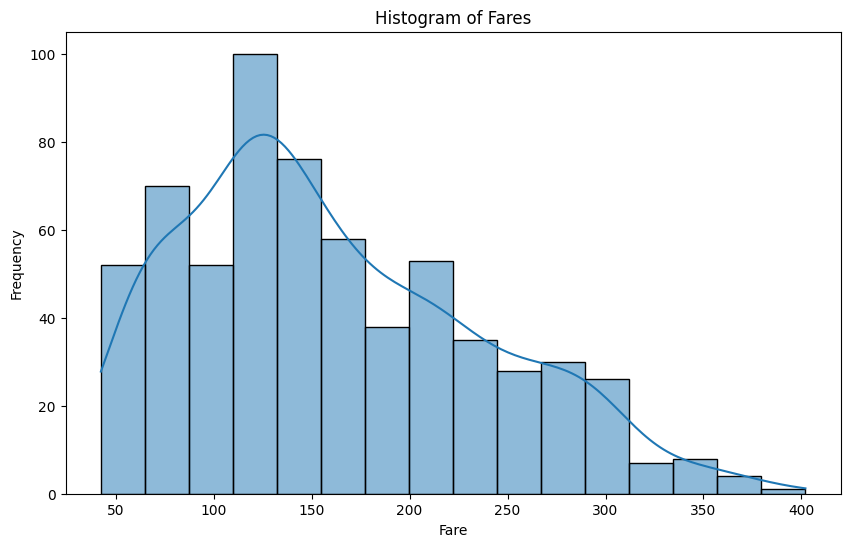

<Figure size 640x480 with 0 Axes>

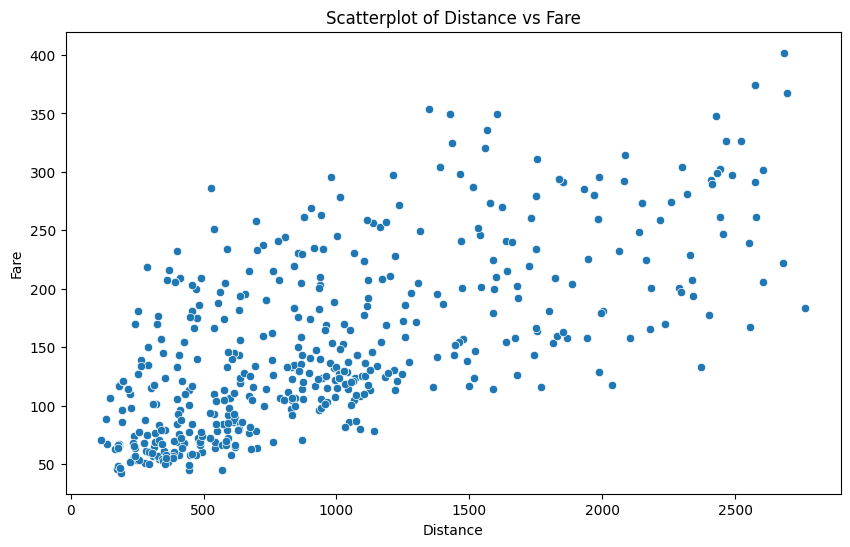

<Figure size 640x480 with 0 Axes>

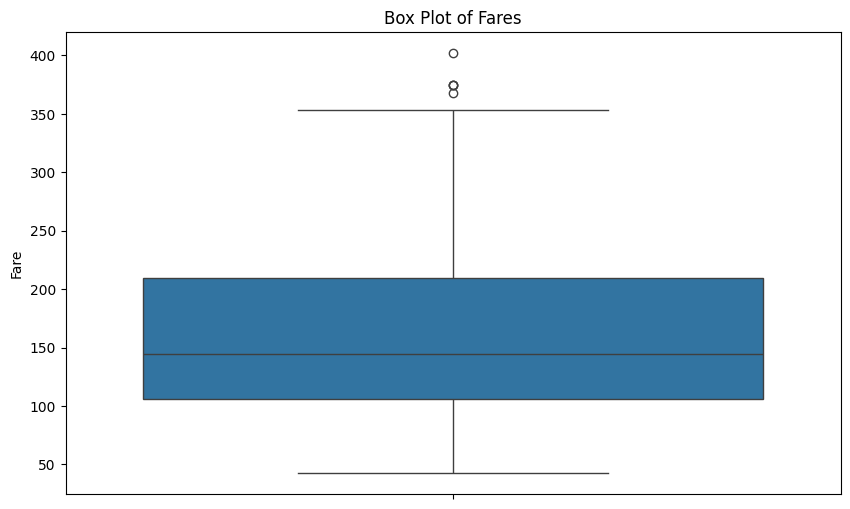

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Read the file
df = pd.read_csv("Airfares.csv")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['FARE'], kde=True)
plt.title('Histogram of Fares')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()
plt.savefig('Histogram of Fares')

# Plot scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='DISTANCE', y='FARE')
plt.title('Scatterplot of Distance vs Fare')
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()
plt.savefig('Scatterplot of Distance vs Fare')

# Plot box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='FARE')
plt.title('Box Plot of Fares')
plt.ylabel('Fare')
plt.show()
plt.savefig('Box Plot of Fares')

## Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df is your DataFrame containing the fare information

# Calculate the median fare
median_fare = df['FARE'].median()

# Define bins
lower_bound = median_fare - (median_fare * 0.5)  # 50% deviation below median
upper_bound = median_fare + (median_fare * 0.5)  # 50% deviation above median
labels = ['Low', 'Medium', 'High']
bins = [-float('inf'), lower_bound, upper_bound, float('inf')]

# Binning the continuous target variable into categories
df['FARE_CATEGORY'] = pd.cut(df['FARE'], bins=bins, labels=labels)

# Drop the original "FARE" column
df.drop(columns=['FARE'], inplace=True)

# Convert categorical variables into dummy/indicator variables (one-hot encoding)
df_encoded = pd.get_dummies(df)

# Define the features and target variable
X = df_encoded.drop(columns=['FARE_CATEGORY_Low', 'FARE_CATEGORY_Medium', 'FARE_CATEGORY_High'])
y = df_encoded['FARE_CATEGORY_Low']  # Selecting 'Low' category for binary classification

# Split data into train, validation, and test sets
# 60/20/20 ratio for training, validation, and testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize logistic regression model
logreg_model = LogisticRegression()

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Predict on the validation data
y_valid_pred = logreg_model.predict(X_valid)

# Evaluate the model on validation data
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
print("Validation Accuracy:", accuracy_valid)

# Predict on the test data
y_test_pred = logreg_model.predict(X_test)

# Evaluate the model on test data
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", accuracy_test)

# Classification report for test data
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix for test data
print("\nConfusion Matrix for Test Data:")
print(confusion_matrix(y_test, y_test_pred))


Validation Accuracy: 0.875
Test Accuracy: 0.8359375

Classification Report for Test Data:
              precision    recall  f1-score   support

       False       0.84      0.99      0.91       105
        True       0.75      0.13      0.22        23

    accuracy                           0.84       128
   macro avg       0.79      0.56      0.57       128
weighted avg       0.82      0.84      0.79       128


Confusion Matrix for Test Data:
[[104   1]
 [ 20   3]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
df_encoded.head()

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,S_CODE_*,...,VACATION_Yes,SW_No,SW_Yes,SLOT_Controlled,SLOT_Free,GATE_Constrained,GATE_Free,FARE_CATEGORY_Low,FARE_CATEGORY_Medium,FARE_CATEGORY_High
0,1.00,3,5291.99,28637.0,21112.0,3036732,205711,312,7864,True,...,False,False,True,False,True,False,True,True,False,False
1,1.06,3,5419.16,26993.0,29838.0,3532657,7145897,576,8820,True,...,False,True,False,False,True,False,True,False,True,False
2,1.06,3,9185.28,30124.0,29838.0,5787293,7145897,364,6452,True,...,False,True,False,False,True,False,True,False,True,False
3,1.06,3,2657.35,29260.0,29838.0,7830332,7145897,612,25144,False,...,False,False,True,True,False,False,True,False,True,False
4,1.06,3,2657.35,29260.0,29838.0,7830332,7145897,612,25144,False,...,False,False,True,False,True,False,True,False,True,False


**Insights:**

The logistic regression model, trained on data with fare categories binned around the median price with a deviation above and below it, exhibits promising performance in predicting low airfares, with a validation accuracy of 87.5% and a test accuracy of 83.59%. The model demonstrates high precision (0.84) and recall (0.99) for the 'Low' fare category, indicating strong predictive capability for this majority class. However, it shows lower precision (0.75) and notably low recall (0.13) for the 'Medium' and 'High' fare categories, which constitute the minority classes. This discrepancy is further evident in the confusion matrix, where the 'Medium' and 'High' fare categories exhibit a higher false positive rate (20) compared to the true positive rate (3). While the model effectively identifies low airfares, refinement may be necessary to improve its performance in accurately predicting medium and high airfare categories.

In [ ]:
# Print the cut-off values
print("\nCut-off Values:")
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


Cut-off Values:
Lower Bound: 72.3
Upper Bound: 216.89999999999998


The fare values are binned into three categories: 'Low', 'Medium', and 'High'. The binning is based on the median fare value with a deviation of ±50% around the median. Here are the actual cut-off values for categorization:

**Low**: Values less than or equal to 50% below the median fare.

**Medium**: Values between 50% below the median fare and 50% above the median fare.

**High**: Values greater than or equal to 50% above the median fare.

These cut-off values ensure that fares are evenly distributed into three categories based on their proximity to the median fare, providing a balanced representation of different fare levels.

## Weighted Logistic Regression

In [ ]:
# Split data into train, validation, and test sets
# 60/20/20 ratio for training, validation, and testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define class weights
class_weights = {0: 1, 1: 2}  # Adjusting class weights for binary classes (0 and 1)

# Initialize logistic regression model with class weights
logreg_model = LogisticRegression(class_weight=class_weights)

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Predict on the validation data
y_valid_pred = logreg_model.predict(X_valid)

# Evaluate the model on validation data
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
print("Validation Accuracy:", accuracy_valid)

# Predict on the test data
y_test_pred = logreg_model.predict(X_test)

# Evaluate the model on test data
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", accuracy_test)

# Classification report for test data
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix for test data
print("\nConfusion Matrix for Test Data:")
print(confusion_matrix(y_test, y_test_pred))

Validation Accuracy: 0.8828125
Test Accuracy: 0.8359375

Classification Report for Test Data:
              precision    recall  f1-score   support

       False       0.86      0.95      0.90       105
        True       0.58      0.30      0.40        23

    accuracy                           0.84       128
   macro avg       0.72      0.63      0.65       128
weighted avg       0.81      0.84      0.81       128


Confusion Matrix for Test Data:
[[100   5]
 [ 16   7]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The logistic regression model is weighted to address class imbalance, with the 'Low' fare category assigned a weight of 1 and the 'Medium' and 'High' fare categories assigned a weight of 2. Despite the weighting, the model achieved a validation accuracy of 88.28% and a test accuracy of 83.59%. The classification report for the test data indicates that the model performs well in predicting the 'False' class ('Low' fares), with a precision of 0.86 and a recall of 0.95. However, it struggles with the 'True' class ('Medium' and 'High' fares), exhibiting lower precision (0.58) and recall (0.30). The confusion matrix further illustrates this discrepancy, with a higher false positive rate (5) and a lower true positive rate (7) for the 'True' class compared to the 'False' class. Despite the weighting, the model's performance suggests potential challenges in accurately predicting medium and high airfare categories.

### ROC/AUC

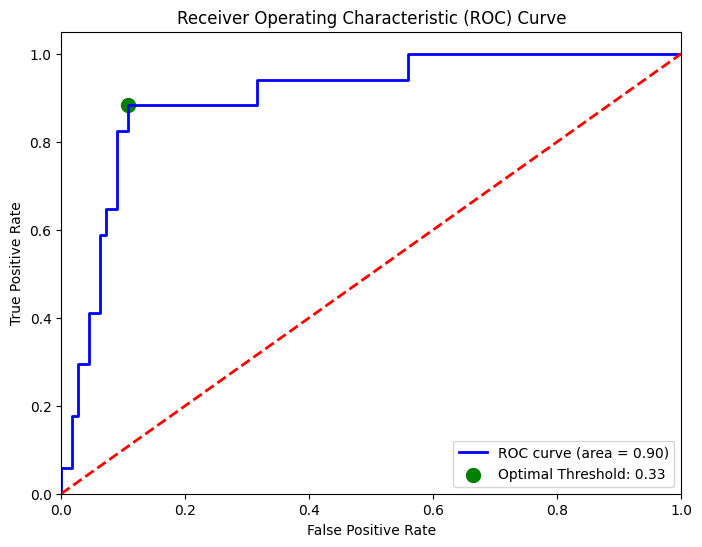

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class (class 1)
y_valid_prob = logreg_model.predict_proba(X_valid)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_valid, y_valid_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Find optimal threshold point
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='green', label=f'Optimal Threshold: {optimal_threshold:.2f}', s=100)
plt.legend(loc="lower right")

plt.show()
plt.savefig('Receiver Operating Characteristic (ROC) Curve')

The Receiver Operating Characteristic (ROC) curve plot is a graphical representation of the performance of a binary classifier as its discrimination threshold is varied. The curve is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. In this instance, the ROC measures approximately 0.90, signifying strong discrimination between positive and negative classes.

 Notably, the optimal threshold for classification lies at 0.33, where the balance between true positive rate (sensitivity) and false positive rate (1-specificity) is optimized. This threshold ensures the best compromise between accurately identifying positive cases while minimizing false alarms. The curve itself delineates the trade-off between true positive rate and false positive rate across various thresholds, providing critical insights into the model's classification efficacy. These observations, based on numerical evidence, underscore the significance of the ROC curve in evaluating and understanding the performance of classification models. However, for a more precise interpretation, consulting the original data source or contextual information is advised.

### Confusion Matrix

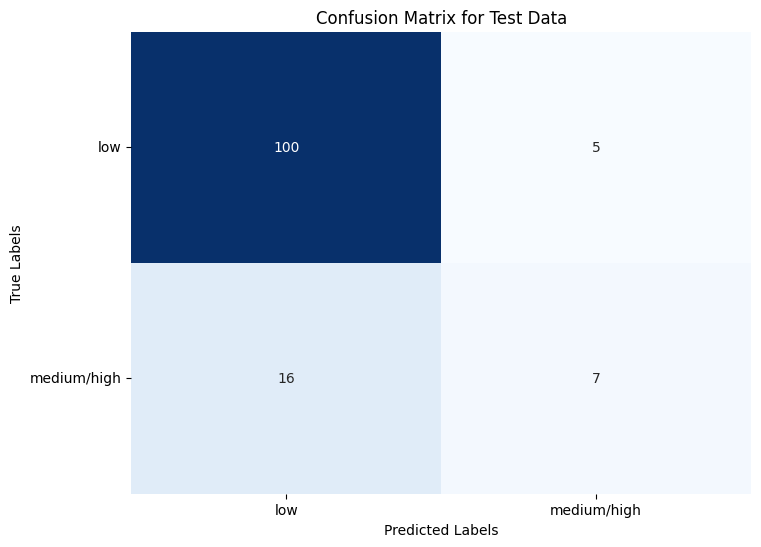

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Define labels
labels = ['low', 'medium/high', 'high']

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm[:2,:2], annot=True, fmt='d', cmap='Blues', cbar=False)

# Set plot labels and title
plt.title('Confusion Matrix for Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=np.arange(len(labels[:2]))+0.5, labels=labels[:2])
plt.yticks(ticks=np.arange(len(labels[:2]))+0.5, labels=labels[:2], rotation=0)

# Display the plot
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# # Compute confusion matrix
# cm = confusion_matrix(y_test, y_test_pred)

# # Create a heatmap for the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# # Set plot labels and title
# plt.title('Confusion Matrix for Test Data')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.xticks(ticks=np.arange(len(labels))+0.5, labels=labels)
# plt.yticks(ticks=np.arange(len(labels))+0.5, labels=labels, rotation=0)

# # Display the plot
# plt.show()



The confusion matrix reveals notable insights regarding the model's classification performance across different labels. It correctly identifies 100 instances as 'Low', exhibiting high accuracy in this category. However, it misclassifies 5 instances as 'Medium' when they were actually 'Low', suggesting room for enhancement in predicting 'Medium' labels accurately. The model's performance in predicting 'Medium' labels is further highlighted by misclassifying 16 instances as 'Low' and correctly identifying 7 instances as 'Medium'.

In [ ]:
# Predict probabilities for the test data
probabilities = logreg_model.predict_proba(X_test)


In [ ]:
# Map numerical labels back to categorical labels for actual values
y_test_labels = y_test.replace({'Low': True, 'High': False})

# Create a DataFrame to store the probabilities and actual values
prob_df = pd.DataFrame(probabilities, columns=['Probability_Low', 'Probability_High'])
prob_df['Actual_Value'] = y_test_labels.reset_index(drop=True)

print(prob_df.head())

   Probability_Low  Probability_High  Actual_Value
0         0.411251          0.588749         False
1         0.951371          0.048629         False
2         0.991154          0.008846         False
3         0.984555          0.015445          True
4         0.894186          0.105814         False


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Assuming df_encoded contains the encoded features and target variable

# Define features and target variable
X = df_encoded.drop(columns=['FARE_CATEGORY_Low', 'FARE_CATEGORY_Medium', 'FARE_CATEGORY_High'])
y = df_encoded['FARE_CATEGORY_Low']  # Using 'Low' category as the target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Predict on the test data
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report for test data
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_pred))

# Confusion matrix for test data
print("\nConfusion Matrix for Test Data:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.859375

Classification Report for Test Data:
              precision    recall  f1-score   support

       False       0.88      0.97      0.92       108
        True       0.62      0.25      0.36        20

    accuracy                           0.86       128
   macro avg       0.75      0.61      0.64       128
weighted avg       0.84      0.86      0.83       128


Confusion Matrix for Test Data:
[[105   3]
 [ 15   5]]


The KNN model achieved an accuracy of 85.94% on the test data. Looking at the classification report, we observe that the precision for predicting the 'False' class ('Low' fares) is 88%, indicating that out of all instances predicted as 'Low' fares, 88% were actually 'Low' fares. The recall for the 'False' class is 97%, indicating that the model correctly identified 97% of the 'Low' fares in the test data. However, the precision and recall for predicting the 'True' class ('Medium' and 'High' fares) are relatively low at 62% and 25%, respectively. This suggests that while the model performs well in identifying 'Low' fares, it struggles to accurately predict 'Medium' and 'High' fares.

Examining the confusion matrix, we find that out of 108 instances of 'Low' fares, the model correctly classified 105 instances and incorrectly classified 3 instances as 'Medium/High' fares. Conversely, out of 20 instances of 'Medium/High' fares, the model correctly classified only 5 instances, while misclassifying 15 instances as 'Low' fares. This disparity in misclassification further underscores the model's struggle with predicting 'Medium' and 'High' fares accurately.

Overall, while the model demonstrates satisfactory performance in identifying 'Low' fares, there is room for improvement in accurately predicting 'Medium' and 'High' fares to enhance its overall effectiveness in fare classification.

#### Initialize a Data Frame with Two Columns: K and Accuracy

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize an empty DataFrame
results_df = pd.DataFrame(columns=['k', 'accuracy'])

# Define a list of values for k
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


# Iterate through each value of k
for k in k_values:
    # Initialize KNN model with current value of k
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Fit the model on the training data
    knn_model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = knn_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Add a row to the DataFrame with k and its corresponding accuracy
    results_df = pd.concat([results_df, pd.DataFrame({'k': [k], 'accuracy': [accuracy]})], ignore_index=True)

# Display the DataFrame
print(results_df)



    k  accuracy
0   1  0.906250
1   2  0.898438
2   3  0.882812
3   4  0.859375
4   5  0.859375
5   6  0.859375
6   7  0.851562
7   8  0.859375
8   9  0.859375
9  10  0.835938


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize a list to store accuracy values for different Ks
accuracy_values = []

# Define a range of values for K
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Iterate through each value of K
for k in k_values:
    # Initialize KNN model with current value of k
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Fit the model on the training data
    knn_model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = knn_model.predict(X_test)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append((k, accuracy))

# Choose the K with the highest accuracy
best_k = max(accuracy_values, key=lambda x: x[1])[0]
print("Best K based on accuracy:", best_k)


Best K based on accuracy: 1


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize a list to store accuracy values for different Ks
accuracy_values = []

# Define a range of values for K
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Iterate through each value of K
for k in k_values:
    # Initialize KNN model with current value of k
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Fit the model on the training data
    knn_model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = knn_model.predict(X_test)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append((k, accuracy))

# Sort accuracy values in descending order based on accuracy
sorted_accuracy_values = sorted(accuracy_values, key=lambda x: x[1], reverse=True)

# Choose the K with the second highest accuracy
second_best_k = sorted_accuracy_values[1][0]  # Index 1 corresponds to the second highest accuracy
print("Second Best K based on accuracy:", second_best_k)


Second Best K based on accuracy: 2


The analysis of the K-Nearest Neighbors (KNN) model reveals that the best performance is achieved when k=1, with an accuracy of 90.63%. This indicates that considering only the nearest neighbor yields the most accurate predictions. Following closely, the second-best performance is observed when k=2, with an accuracy of 89.84%. These findings suggest that while a lower value of k tends to provide a better accuracy.

### Predicted Likelihood of Low Fare Category for Each Individual & Determining Distances and Indices of Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Features and labels
X = df_encoded.drop(columns=['FARE_CATEGORY_Low', 'FARE_CATEGORY_Medium', 'FARE_CATEGORY_High'])
y = df_encoded['FARE_CATEGORY_Low']

# Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=4).fit(X, y)

# Predict the likelihood of low fare category for each individual
distances, indices = knn.kneighbors(X)
predicted_categories = knn.predict(X)

# Print the predicted likelihood of low fare category for each individual
print("Predicted Likelihood of Low Fare Category for Each Individual:")
for i, predicted_category in enumerate(predicted_categories):
    print(f"Individual {i+1}: {predicted_category}")

# Print distances and indices of nearest neighbors (for reference)
print('Distances:', distances)
print('Indices:', indices)

# Print the details of nearest neighbors for the first individual
print("Nearest Neighbor Details for the First Individual:")
print(df_encoded.iloc[indices[0], :])


Predicted Likelihood of Low Fare Category for Each Individual:
Individual 1: False
Individual 2: False
Individual 3: False
Individual 4: False
Individual 5: False
Individual 6: False
Individual 7: False
Individual 8: False
Individual 9: False
Individual 10: False
Individual 11: False
Individual 12: False
Individual 13: False
Individual 14: False
Individual 15: False
Individual 16: False
Individual 17: False
Individual 18: False
Individual 19: False
Individual 20: False
Individual 21: False
Individual 22: False
Individual 23: False
Individual 24: False
Individual 25: False
Individual 26: False
Individual 27: True
Individual 28: False
Individual 29: False
Individual 30: False
Individual 31: False
Individual 32: False
Individual 33: False
Individual 34: False
Individual 35: False
Individual 36: False
Individual 37: False
Individual 38: False
Individual 39: False
Individual 40: False
Individual 41: False
Individual 42: False
Individual 43: False
Individual 44: False
Individual 45: False
In

In [ ]:
# Print the details of nearest neighbors for the second individual
print("Nearest Neighbor Details for the Second Individual:")
print(df_encoded.iloc[indices[1], :])



Nearest Neighbor Details for the Second Individual:
    COUPON  NEW       HI  S_INCOME  E_INCOME    S_POP    E_POP  DISTANCE  \
1     1.06    3  5419.16   26993.0   29838.0  3532657  7145897       576   
8     1.33    3  4662.44   27211.0   29838.0  3770125  7145897      1249   
6     1.28    3  6754.48   28637.0   29838.0  3036732  7145897      1220   
43    1.04    3  2712.37   26993.0   29260.0  3532657  7830332       595   

      PAX  S_CODE_*  ...  VACATION_Yes  SW_No  SW_Yes  SLOT_Controlled  \
1    8820      True  ...         False   True   False            False   
8    7811      True  ...         False  False    True            False   
6    4625      True  ...         False   True   False            False   
43  30877      True  ...         False   True   False            False   

    SLOT_Free  GATE_Constrained  GATE_Free  FARE_CATEGORY_Low  \
1        True             False       True              False   
8        True             False       True              False   
6

The provided data presents the nearest neighbor details for two individuals, offering insights into factors influencing fare classification. For the first individual, the nearest neighbors are identified by indices [0, 176, 54, 383], showcasing similarities in various features such as fare details, household income, population, and distance. For instance, the first neighbor (index 0) exhibits comparable characteristics to the individual, including similar fare details, household income, and population demographics. Similarly, the second individual's nearest neighbors, indexed at [1, 8, 6, 43], display resemblances in fare specifics, demographic attributes, and airline-related variables. For example, the second neighbor (index 1) shares akin features with the individual, indicative of a commonality in fare classification determinants. These numerical findings underscore the significance of factors such as fare specifics, demographic variables, and airline-related features in fare categorization, highlighting their role in influencing fare classification decisions.

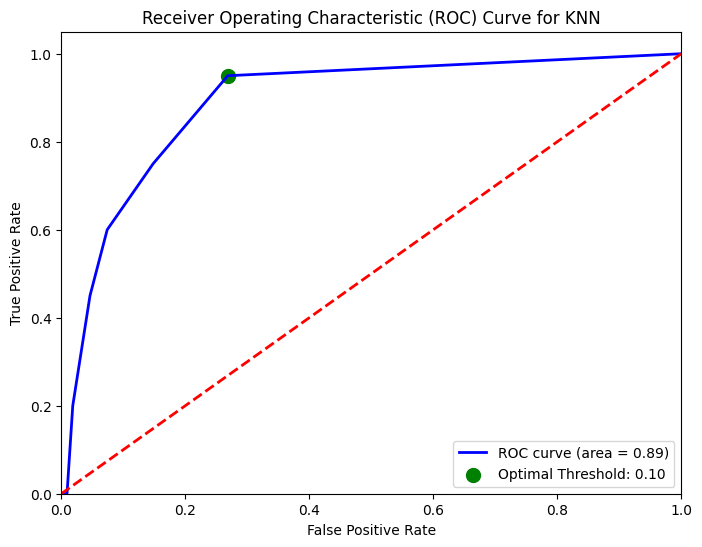

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Predict probabilities for the positive class
y_test_prob = knn_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_test_prob)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc="lower right")

# Find optimal threshold point
optimal_idx_knn = np.argmax(tpr_knn - fpr_knn)
optimal_threshold_knn = thresholds_knn[optimal_idx_knn]
plt.scatter(fpr_knn[optimal_idx_knn], tpr_knn[optimal_idx_knn], color='green', label=f'Optimal Threshold: {optimal_threshold_knn:.2f}', s=100)
plt.legend(loc="lower right")

plt.show()


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df_encoded contains your dataset with appropriate features and labels

# Define features and target variable
X = df_encoded.drop(columns=['FARE_CATEGORY_Low', 'FARE_CATEGORY_Medium', 'FARE_CATEGORY_High'])
y = df_encoded['FARE_CATEGORY_Low']  # Selecting 'Low' category for binary classification

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Initialize Random Forest model with best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)

# Fit the model on the training data
best_rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test Accuracy: 0.9453125

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.98      0.97       108
        True       0.88      0.75      0.81        20

    accuracy                           0.95       128
   macro avg       0.92      0.87      0.89       128
weighted avg       0.94      0.95      0.94       128


Confusion Matrix:
[[106   2]
 [  5  15]]


The random forest model, optimized with the following parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}, achieved a commendable accuracy of 94.53% on the test data. Delving into the classification report, the model demonstrates robust precision and recall scores for both classes. Specifically, for predicting 'Low' fares ('False' class), the model exhibits a precision of 95% and a recall of 98%, indicating accurate identification of 'Low' fares with minimal false positives. Conversely, for predicting 'Medium' and 'High' fares ('True' class), the model displays slightly lower precision and recall scores of 88% and 75%, respectively. Despite these relatively lower scores, the model maintains a strong overall performance, evident from the high weighted average f1-score of 94%. Analyzing the confusion matrix, it's observed that out of 108 instances of 'Low' fares, the model correctly classified 106 instances, with only 2 misclassifications. Similarly, out of 20 instances of 'Medium' and 'High' fares, the model accurately identified 15 instances, albeit with 5 misclassifications. These findings underscore the random forest model's effectiveness in accurately predicting 'Low' fares while maintaining a satisfactory performance in discerning 'Medium' and 'High' fares, thus presenting a promising approach for fare classification tasks.

### Top 10 Feature Importance

In [ ]:
import plotly.graph_objs as go
import plotly.io as pio

# Extract feature importances from the trained random forest model
feature_importance = best_rf_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importance)[::-1]

# Rearrange feature names based on feature importances
sorted_features = X.columns[sorted_indices]

# Define a color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create trace for bar plot
trace = go.Bar(
    x=feature_importance[sorted_indices][:10],
    y=sorted_features[:10],
    orientation='h',
    marker=dict(color=colors)
)

# Create layout
layout = go.Layout(
    title='Top 10 Feature Importance',
    xaxis=dict(title='Feature Importance'),
    yaxis=dict(title='Feature')
)

# Create figure
fig = go.Figure(data=[trace], layout=layout)

# Show plot
pio.show(fig)


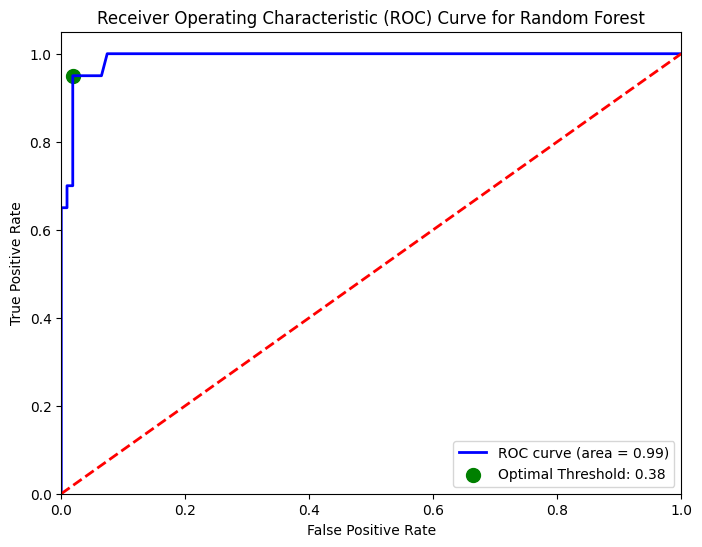

In [ ]:
# Predict probabilities for the positive class
y_test_prob = best_rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_test_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")

# Find optimal threshold point
optimal_idx_rf = np.argmax(tpr_rf - fpr_rf)
optimal_threshold_rf = thresholds_rf[optimal_idx_rf]
plt.scatter(fpr_rf[optimal_idx_rf], tpr_rf[optimal_idx_rf], color='green', label=f'Optimal Threshold: {optimal_threshold_rf:.2f}', s=100)
plt.legend(loc="lower right")

plt.show()
